In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy.stats import chi2_contingency

df_clean = pd.read_csv('../data/clean.csv')

# Heatmap

**The heatmap, alongside clinically known CKD signaling features (hemo, sc, etc.), was used to choose the x variables for the ML models while also getting a glance at multicollinearity. Below is both the heatmap of every variable in the dataset and another focusing on the variables of interest.**

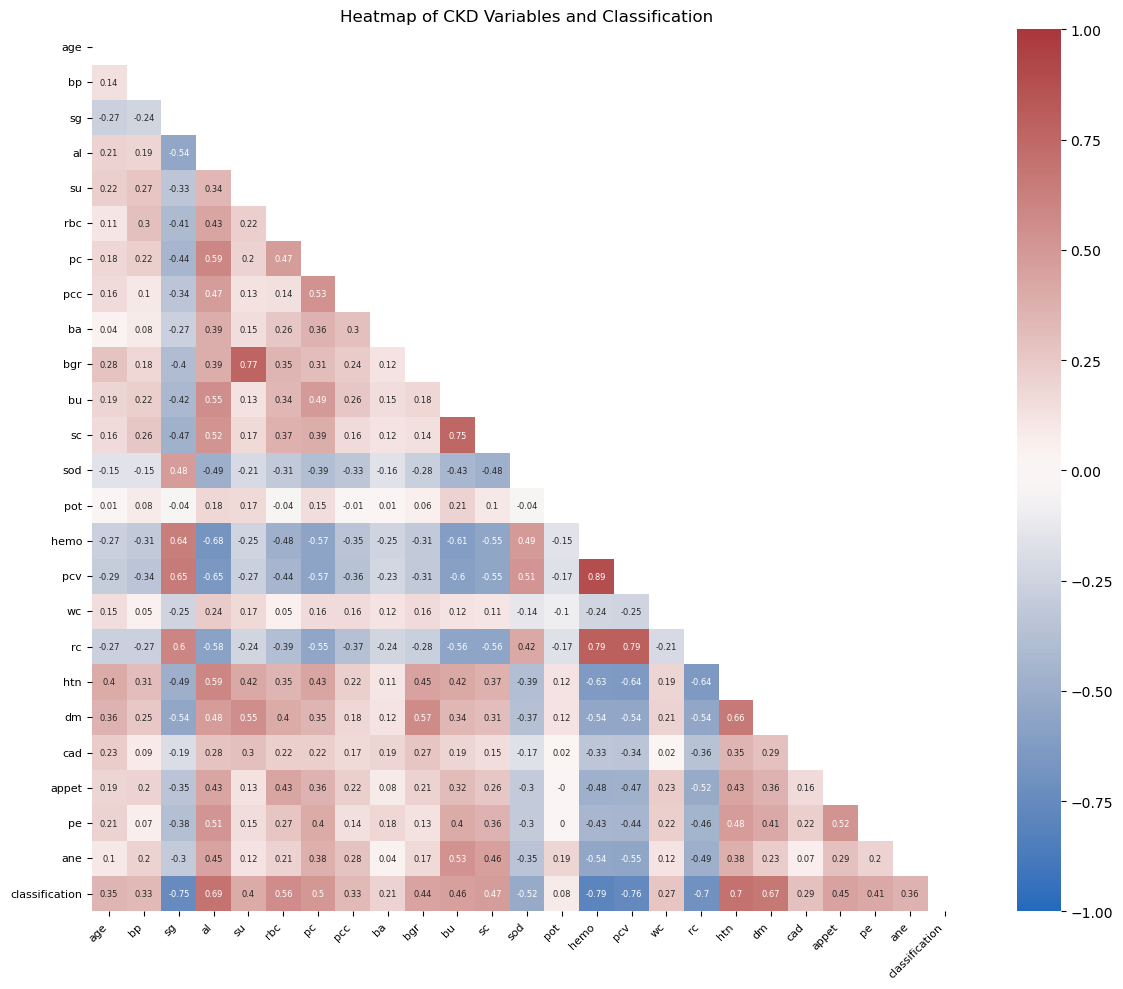

In [51]:
corr_matrix_1 = df_clean.corr().round(2)

# Removes the top triangle of the heatmap --> avoids redundancy
mask = np.triu(np.ones_like(corr_matrix_1, dtype=bool))

plt.figure(figsize=(12,10))
heatmap_1 = sns.heatmap(corr_matrix_1, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag', mask=mask, annot_kws={"size":6})
plt.title("Heatmap of CKD Variables and Classification")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig("../figures/exploratory/heatmap_all_variables.png", dpi=300, bbox_inches='tight')
plt.show()

### Features of Interest

**These were the main features of interest due to the correlation coefficients not being > 0.7, which could hint at multicollinearity and confuse the model. This is why features like blood urea were not included, due to the 0.75 coefficient with serum creatinine. It's important to note that the high coefficients for 'Classification' are actually good for the model, since it's the y variable, not x.**

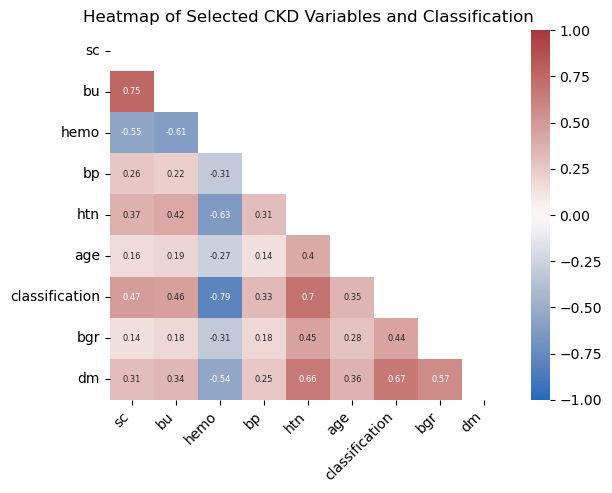

In [52]:
selected_features = ['sc', 'bu', 'hemo', 'bp', 'htn', 'age', 'classification', 'bgr', 'dm']
df_select = df_clean[selected_features]

corr_matrix_2 = df_select.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix_2, dtype=bool))

plt.figure()
heatmap_2 = sns.heatmap(corr_matrix_2, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag', mask=mask, annot_kws={"size":6})
plt.title("Heatmap of Selected CKD Variables and Classification")
plt.xticks(rotation=45, ha="right")
plt.savefig("../figures/exploratory/heatmap_select_variables.png", dpi=300, bbox_inches='tight')
plt.show()

# Hemoglobin

**The kidneys are responsible for hemoglobin production, and it's known that hemoglobin levels decrease in CKD patients due to kidney damage, making it a top indicator for the model. Although CLT was met (n>>30), the Mann-Whitney test was taken to confirm outliers and skewness of the original data didn't affect the results for 'hemo' and 'sc' since they were the most important features for the model.**

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Welch's t-test independent samples, P_val:3.980e-66 t=2.300e+01


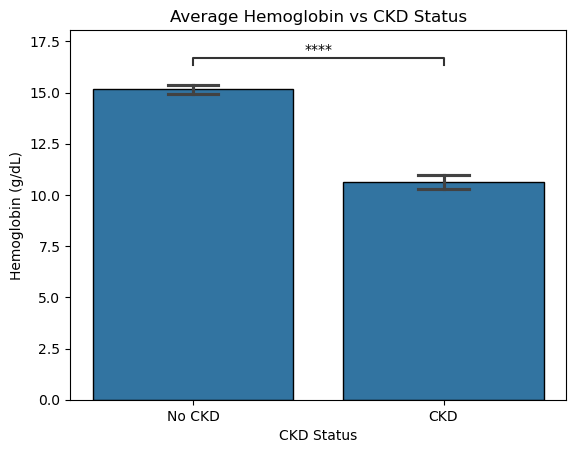

In [53]:
graph_hemo = sns.barplot(
    data=df_clean,
    x='classification', 
    y='hemo', errorbar='ci', 
    capsize=0.2,
    edgecolor='black',
    )
plt.title('Average Hemoglobin vs CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('Hemoglobin (g/dL)')
plt.xticks([0,1], ["No CKD", "CKD"])

# The variances are not known to be equal, so we use Welch's t-test (the central limit theorem is satisfied)
# The data has a skew to the left, so a Mann-Whitney test was also taken to confirm the results (p = 1.064e-20)

pairs = [(0, 1)] 
annotator = Annotator(graph_hemo, pairs, data=df_clean, x='classification', y='hemo')
annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.savefig("../figures/exploratory/hemo.png", dpi=300, bbox_inches='tight')
plt.show()

# Serum Creatinine

**Serum creatinine is filtered by the kidneys and measured clinically to determine their function. In CKD patients, kidney damage leads to a buildup of serum creatinine, also making it a top indicator.**

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Welch's t-test independent samples, P_val:4.991e-19 t=-1.015e+01


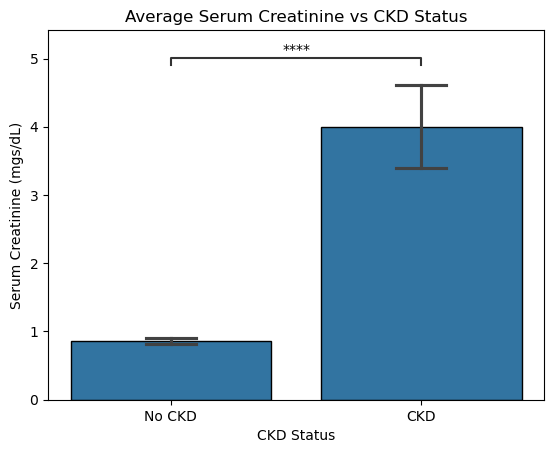

In [54]:
graph_sc = sns.barplot(
    data=df_clean,
    x='classification', 
    y='sc', errorbar='ci', 
    capsize=0.2,
    edgecolor='black'
    )
plt.title('Average Serum Creatinine vs CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('Serum Creatinine (mgs/dL)')
plt.xticks([0,1], ["No CKD", "CKD"])

# The variances are not known to be equal, so we use Welch's t-test (central limit theorem satisfied)
# The data has a skew to the right, so a Mann-Whitney test was also taken to confirm the results (p = 1.271e-20)

pairs = [(0, 1)] 
annotator = Annotator(graph_sc, pairs, data=df_clean, x='classification', y='sc')
annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.savefig("../figures/exploratory/serum_creatinine.png", dpi=300, bbox_inches='tight')
plt.show()

# Blood Pressure & Hypertension 

**High blood pressure can cause and worsen CKD. BP can fluctuate a lot over a day, so a hypertension diagnosis (chronic high blood pressure) is utilized alongside it to get the full picture.**

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Welch's t-test independent samples, P_val:1.573e-09 t=-6.263e+00


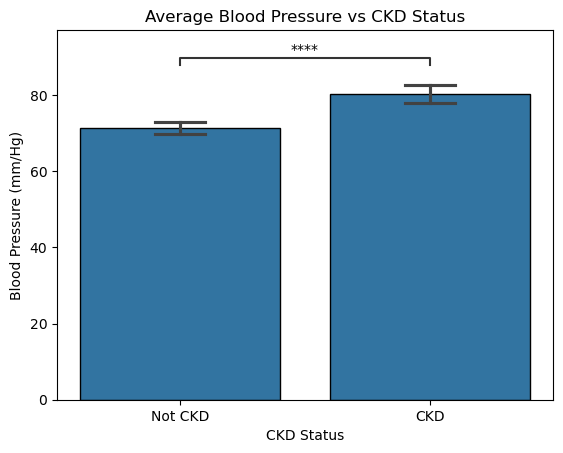

In [55]:
graph_bp = sns.barplot(
    data=df_clean,
    x='classification', 
    y='bp', errorbar='ci', 
    capsize=0.2,
    edgecolor='black'
    )
plt.title('Average Blood Pressure vs CKD Status')
plt.xlabel('CKD Status')
plt.xticks([0,1], ["Not CKD", "CKD"])
plt.ylabel('Blood Pressure (mm/Hg)')


# The variances are not known to be equal, so we use a Welch's t-test. 
# The central limit theorem applies (n >> 30), and the distribution was also approximately normal.

pairs = [(0, 1)] 
annotator = Annotator(graph_bp, pairs, data=df_clean, x='classification', y='bp')
annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.savefig("../figures/exploratory/blood_pressue.png", dpi=300, bbox_inches='tight')
plt.show()

### Chi-Square Test for Hypertension (High BP diagnosis)

In [56]:
observed_htn = pd.crosstab(df_clean["htn"], df_clean["classification"])
print(observed_htn) 
# None of the entries are < 5 so we proceed with Chi-Square

classification    0    1
htn                     
0               132   51
1                 0  110


In [57]:
chi2, p, dof, expected = chi2_contingency(observed_htn)
print(f"p = {p:.4g}")
# There is a strong association between hypertension and CKD status

p = 1.252e-32


# Blood Glucose (Random) & Diabetes Mellitus  

**Diabetes is the most commonly known cause of CKD worldwide, due to individuals having consistently high blood glucose levels. Blood Glucose can fluctuate during the day, similar to BP, so we examine both features to get the full picture.**

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Welch's t-test independent samples, P_val:6.077e-17 t=-9.289e+00


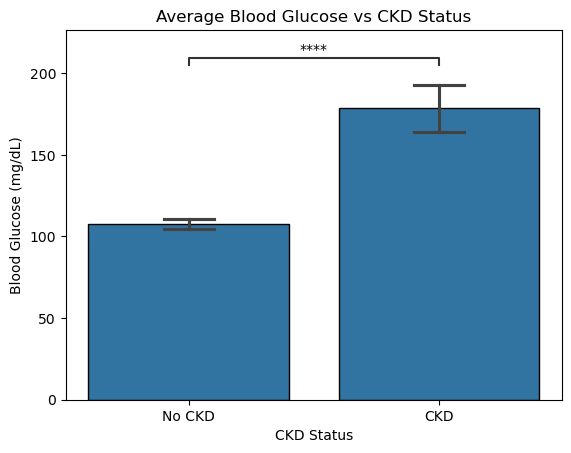

In [58]:
graph_bgr = sns.barplot(
    data=df_clean,
    x='classification', 
    y='bgr', errorbar='ci', 
    capsize=0.2,
    edgecolor='black'
    )
plt.title('Average Blood Glucose vs CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('Blood Glucose (mg/dL)')
plt.xticks([0,1], ["No CKD", "CKD"])

# The variances are not known to be equal, so we use a Welch's t-test. 
# The central limit theorem applies (n >> 30), and the distribution was also approximately normal.

pairs = [(0, 1)] 
annotator = Annotator(graph_bgr, pairs, data=df_clean, x='classification', y='bgr')
annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.savefig("../figures/exploratory/blood_glucose_random.png", dpi=300, bbox_inches='tight')
plt.show()

### Chi-Squared Test for Diabetes Mellitus Diagnosis 

In [59]:
observed_dm = pd.crosstab(df_clean["dm"], df_clean["classification"])
print(observed_dm) 
# None of the entries are < 5 so we proceed with Chi-Square

classification    0    1
dm                      
0               132   57
1                 0  104


In [60]:
chi2, p, dof, expected = chi2_contingency(observed_dm)
print(f"p = {p:.4g}")
# There is a strong association between diabetes mellitus and CKD status

p = 5.599e-30


# Age

**The body's condition worsens with age and becomes prone to chronic conditions like hypertension and diabetes which influence CKD.**

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Welch's t-test independent samples, P_val:1.370e-09 t=-6.280e+00


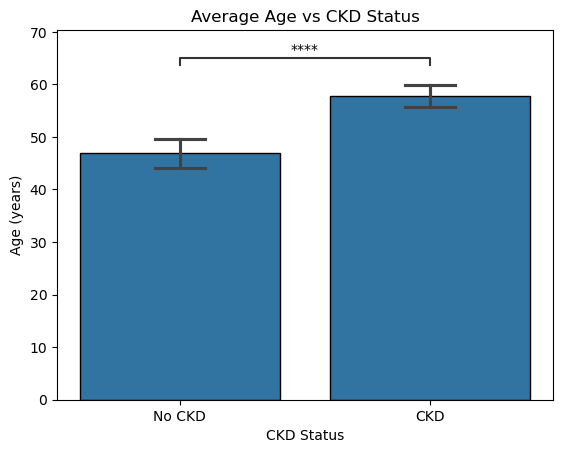

In [61]:
graph_age = sns.barplot(
    data=df_clean,
    x='classification', 
    y='age', 
    errorbar='ci', 
    capsize=0.2,
    edgecolor='black'
    )
plt.title('Average Age vs CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('Age (years)')
plt.xticks([0,1], ["No CKD", "CKD"])

# The variances are not known to be equal, so we use a Welch's t-test. 
# The central limit theorem applies (n >> 30), and the distribution was also approximately normal.

pairs = [(0, 1)] 
annotator = Annotator(graph_age, pairs, data=df_clean, x='classification', y='age')
annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.savefig("../figures/exploratory/age.png", dpi=300, bbox_inches='tight')
plt.show()